### Import Libraries

In [24]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, auc, roc_curve, precision_score, recall_score

### Load data

In [25]:
# read train
train = pd.read_csv("train.csv")
print(train.shape)
train.head()
print(train.isnull().sum())

# read test
test= pd.read_csv("test.csv")
print(test.shape)
test.head()
print(train.isnull().sum())

(28709, 2)
emotion    0
pixels     0
dtype: int64
(7178, 2)
emotion    0
pixels     0
dtype: int64


### Tain and Test variables

In [26]:
Y_train = train["emotion"]
Y_test = test["emotion"]

X_train = train.drop(labels = ["emotion"],axis = 1)
X_test = test.drop(labels = ["emotion"], axis = 1)
print("X_train shape is: ", X_train.shape)
print("X_test shape is: ", X_test.shape)

X_train shape is:  (28709, 1)
X_test shape is:  (7178, 1)


### Splitting pixels into numeric

In [27]:
X_train = X_train['pixels'].str.split(expand=True).astype(int)
X_test = X_test['pixels'].str.split(expand=True).astype(int)

# Example: Access the first matrix in X_train
print("First image matrix in train:\n", X_train.iloc[0])
print("First image matrix in test :\n", X_test.iloc[0])

First image matrix in train:
 0        70
1        80
2        82
3        72
4        58
       ... 
2299    116
2300     95
2301    106
2302    109
2303     82
Name: 0, Length: 2304, dtype: int64
First image matrix in test :
 0       254
1       254
2       254
3       254
4       254
       ... 
2299      0
2300      0
2301     42
2302    129
2303    180
Name: 0, Length: 2304, dtype: int64


In [28]:
print("X_train shape is: ", X_train.shape)
print("X_test shape is: ", X_test.shape)

X_train shape is:  (28709, 2304)
X_test shape is:  (7178, 2304)


In [29]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


### Preprocess data

C:\Users\bisho\AppData\Local\Temp\ipykernel_1224\701754767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train, palette="icefire")


emotion
3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: count, dtype: int64

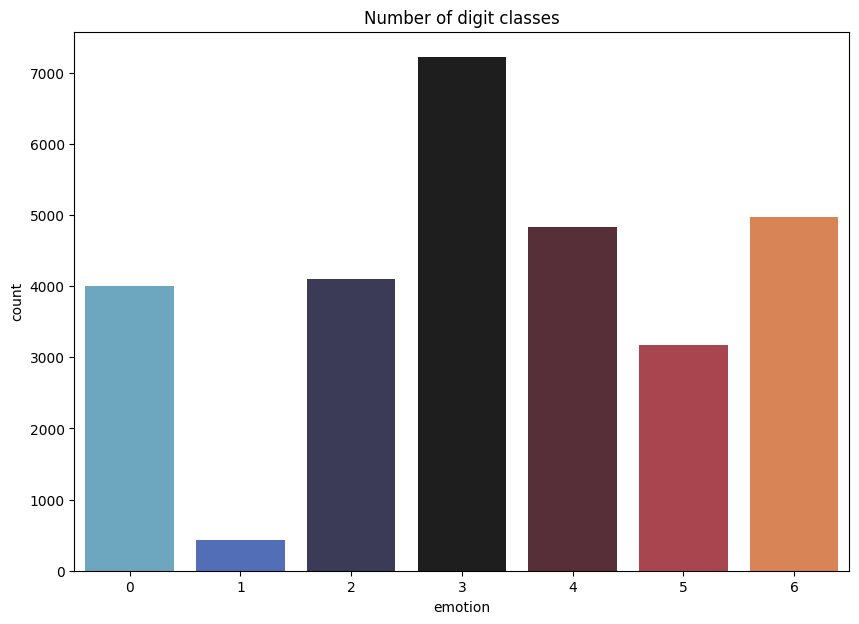

In [30]:
# visualize number of digits classes
plt.figure(figsize=(10,7))
sns.countplot(x=Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

### Extract Features

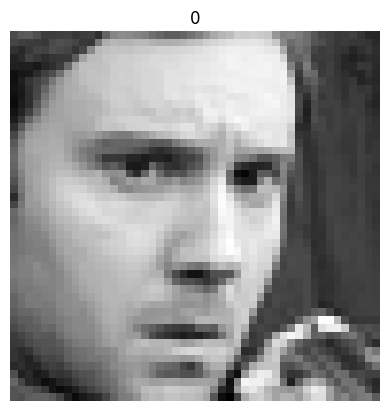

In [31]:

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()
img = X_train[0]
img = img.reshape((48,48))
plt.imshow(img,cmap='gray')
plt.title(Y_train[0])
plt.axis("off")
plt.show()

### Data Normalization

In [32]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (28709, 2304)
x_test shape:  (7178, 2304)


### Logistic Regression Classifier

In [33]:
lr = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

# Train the model
lr.fit(X_train, Y_train)

C:\Users\bisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\bisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

### Model Prediction

In [34]:
Y_pred = lr.predict(X_test)

### Confusion Matrix

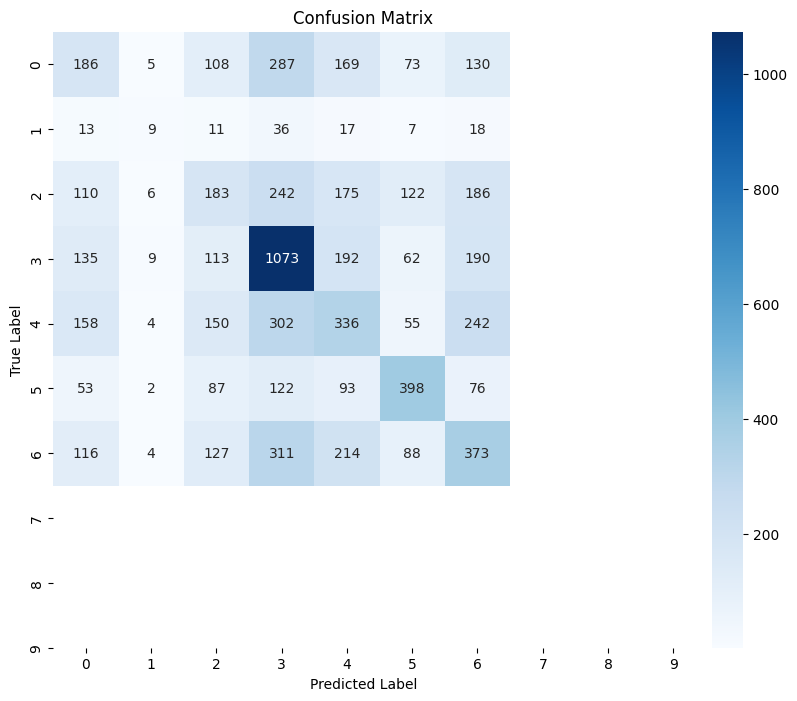

In [35]:
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Images Visualization

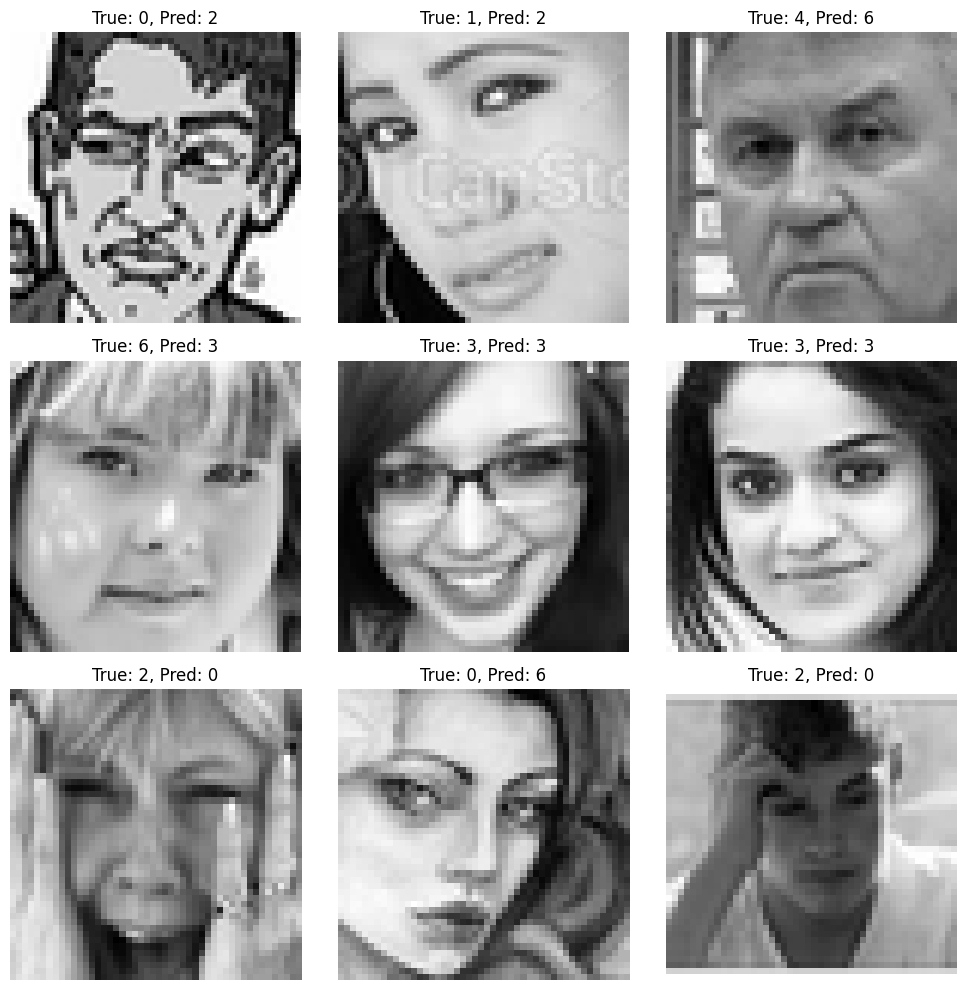

In [36]:
# Visualize a few predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i].reshape(48, 48), cmap='gray')
    plt.title(f"True: {Y_test[i]}, Pred: {Y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Accuracy Score

In [37]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.3564


### Loss Curve

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

log_reg = LogisticRegression(max_iter=1000) 
log_reg.fit(X_train, Y_train)
y_pred_prob = log_reg.predict_proba(X_test)
loss = log_loss(Y_test, y_pred_prob)
print(f"The total log loss is: {loss:.4f}")


The total log loss is: 1.7209


C:\Users\bisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### AUC Scores and ROC

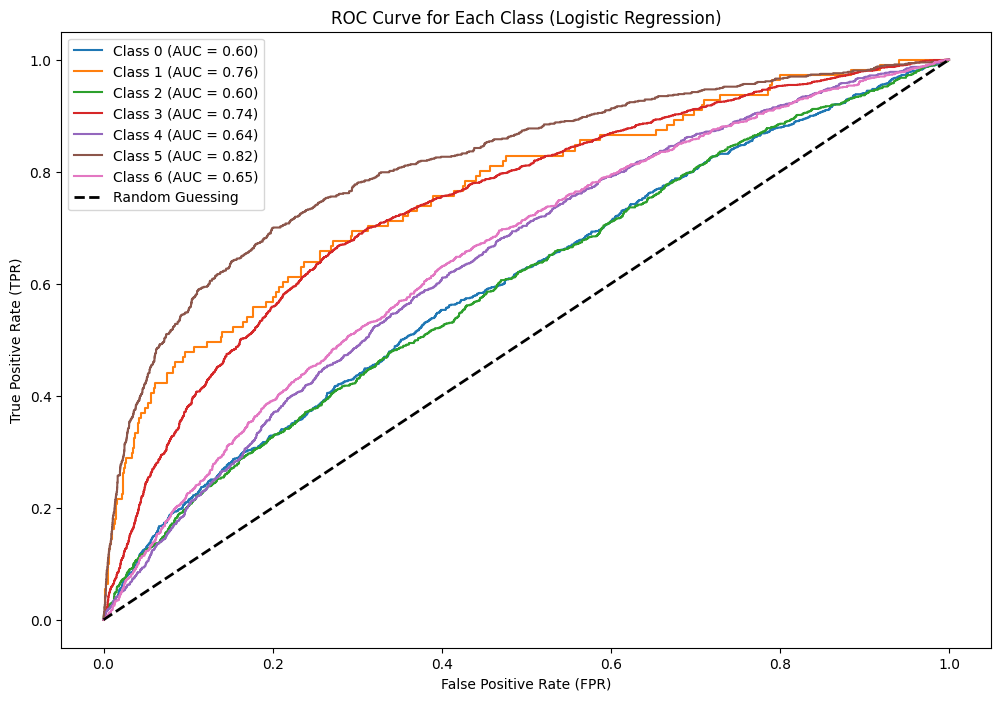

Macro-Average AUC: 0.7374


In [39]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the true labels for multiclass classification
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_train))  # binarize using the unique classes
n_classes = Y_test_bin.shape[1]

# Get probabilities from the logistic regression model
Y_pred_prob = log_reg.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], Y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Add random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guessing')

# Finalize the plot
plt.title("ROC Curve for Each Class (Logistic Regression)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="best")
plt.show()

# Compute macro-average AUC
fpr_macro, tpr_macro, _ = roc_curve(Y_test_bin.ravel(), Y_pred_prob.ravel())
macro_auc = auc(fpr_macro, tpr_macro)
print(f"Macro-Average AUC: {macro_auc:.4f}")


### Precision and Recall

Precision for each class:
Class 0: 0.2412
Class 1: 0.2308
Class 2: 0.2349
Class 3: 0.4522
Class 4: 0.2809
Class 5: 0.4944
Class 6: 0.3070

Recall for each class:
Class 0: 0.1942
Class 1: 0.0811
Class 2: 0.1787
Class 3: 0.6048
Class 4: 0.2694
Class 5: 0.4789
Class 6: 0.3025


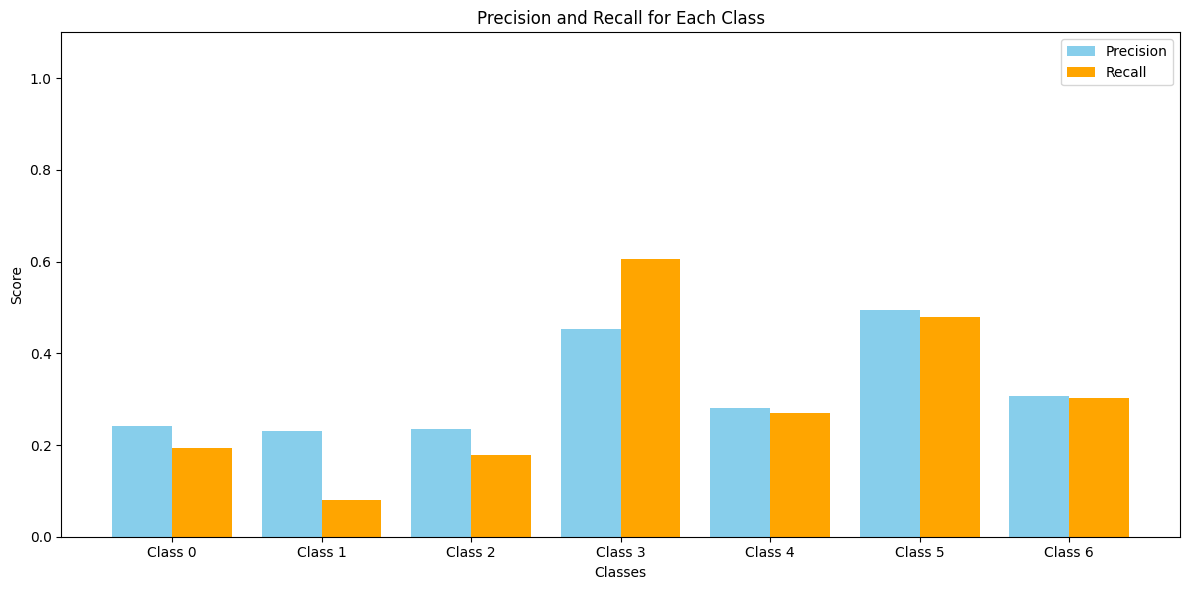

In [40]:
# Calculate Precision and Recall for each class
precision = precision_score(Y_test, Y_pred, average=None)
recall = recall_score(Y_test, Y_pred, average=None)
classes = [f"Class {i}" for i in range(len(precision))]

# Print Precision and Recall
print("Precision for each class:")
for cls, prec in zip(classes, precision):
    print(f"{cls}: {prec:.4f}")

print("\nRecall for each class:")
for cls, rec in zip(classes, recall):
    print(f"{cls}: {rec:.4f}")

# Visualize Precision and Recall as bar charts
plt.figure(figsize=(12, 6))
bar_width = 0.4
indices = range(len(classes))

plt.bar(indices, precision, bar_width, label='Precision', color='skyblue')
plt.bar([i + bar_width for i in indices], recall, bar_width, label='Recall', color='orange')

# Customize the plot
plt.title("Precision and Recall for Each Class")
plt.xlabel("Classes")
plt.ylabel("Score")
plt.xticks([i + bar_width / 2 for i in indices], classes)
plt.ylim(0, 1.1)  # Scores range from 0 to 1
plt.legend(loc="best")
plt.tight_layout()
plt.show()
